<a href="https://colab.research.google.com/github/eric-weiss/3D-Rendering-with-Geometric-Algebra/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import pi,e
import numpy as np
from matplotlib import pyplot as pp
from cga import *
import math

ModuleNotFoundError: ignored

The conformal geometric algebra of n dimensional space requires n + 2 basis vectors. We are starting from 3 dimensional space so these two extra vectors are named e4 and e5. These vectors lack a simple geometric interpretation, but we can use them to create two additional basis elements, no and ni, that correspond to the origin and to the point at infinity, respectively.

In [ ]:
no = (e4 + e5)*0.5
ni = e5 - e4

In [ ]:
def conformal_point(r):
    return no + r[0]*e1 + r[1]*e2 + r[2]*e3 + 0.5*(r[0]**2+r[1]**2+r[2]**2)*ni

Building a sphere from 4 points:

In [ ]:
p1=conformal_point([1,0,0])
p2=conformal_point([0,1,0])
p3=conformal_point([-1,0,0])
p4=conformal_point([0,0,1])
s=p1^p2^p3^p4

Creating a 2D grid of coordinates on the image plane:

In [ ]:
n=64
focal_length = 1.0
X = np.linspace(-.5,0.5,n)
X, Y = np.meshgrid(X, X)
Z = np.zeros((n,n)) + focal_length
R = np.stack((X, Y, Z)).T.reshape(n*n, 3).tolist()

Converting the euclidean coordinates to conformal points:

In [ ]:
cga_points = list(map(conformal_point, R))

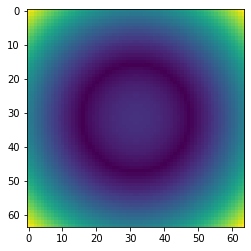

In [ ]:
vals = np.array([(c^point).norm() for point in cga_points])
vals=vals.reshape(n, n)
pp.imshow(vals)
pp.show()